# Dispersion

When radio waves from a pulsar travel through space, they do not all arrive at Earth at the same time.

The space between stars is not empty.  
It contains free electrons, which slow down radio waves as they travel.

---

### What is dispersion?

Lower-frequency radio waves are slowed down **more** than higher-frequency radio waves.

This means:
- high-frequency radio waves arrive **first**
- low-frequency radio waves arrive **later**

This effect is called **dispersion**.

---

### What does dispersion look like in our data?

Because we record data in many frequency channels, the same pulsar pulse appears at a **slightly different time** in each channel.

If we look at all channels together:
- the pulse is spread out in time
- the signal looks smeared
- the pulse is harder to see

---

### Why dispersion matters for stacking channels

Earlier, we learned that we can improve the signal-to-noise ratio by **adding many frequency channels together**.

However, because of dispersion, the pulses in different channels do **not line up in time**.

If we try to stack the channels without correcting for dispersion:
- the pulses do not align
- the signal becomes weaker
- the noise does not cancel properly

This means we **cannot stack frequency channels correctly anymore**.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

Below we have the case where there is no delay between the channels. In this case when we stack all the pulses they all add up together.

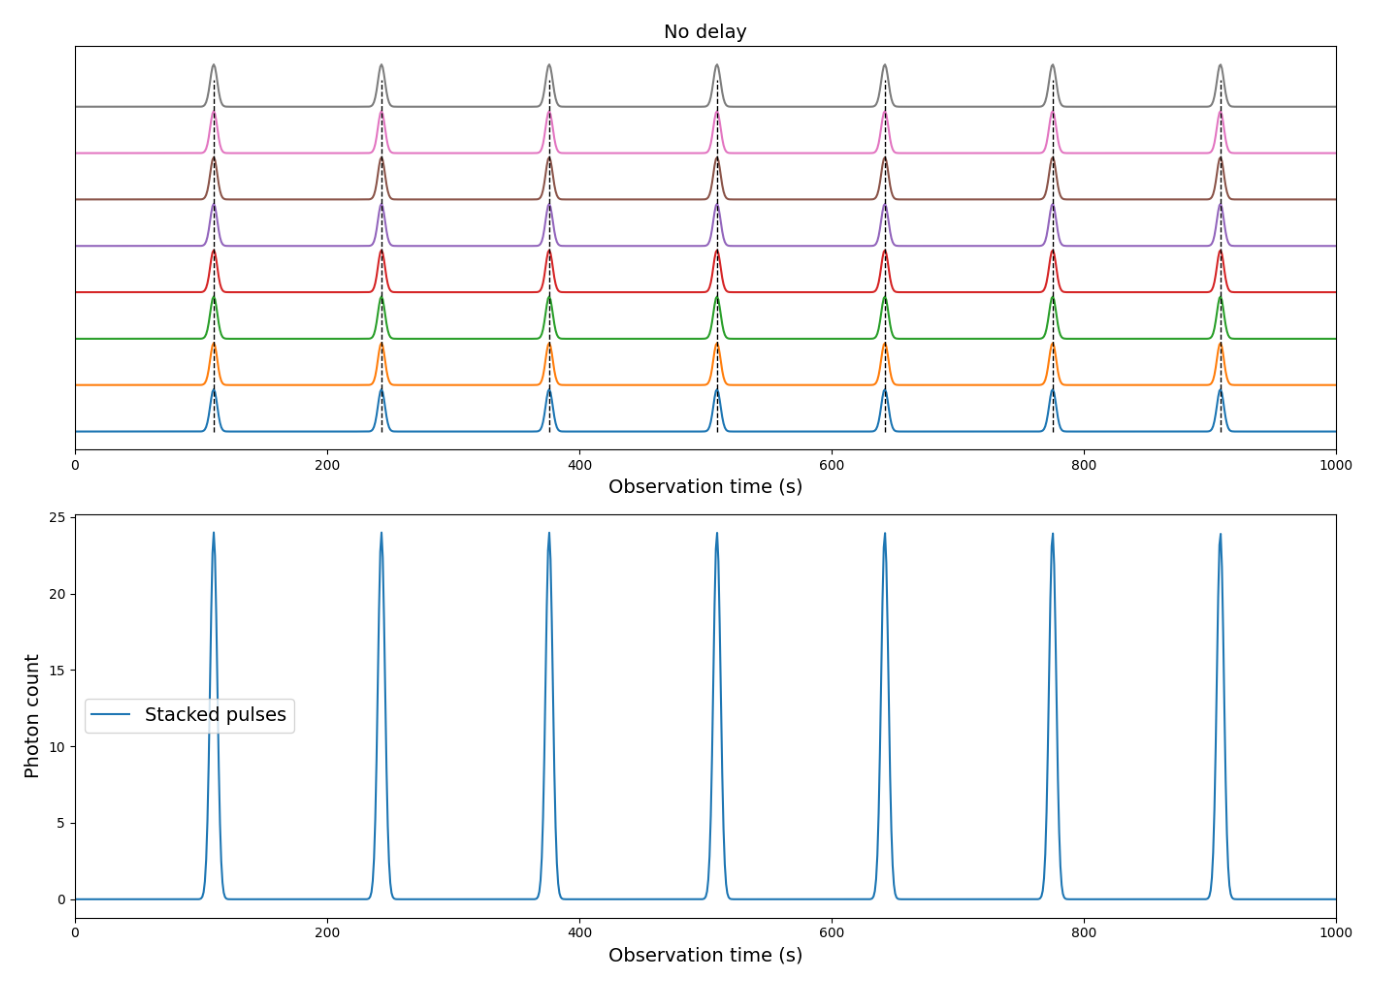

In [9]:
img = plt.imread("data_2/stacked_pulses.png")

plt.figure(figsize=(20, 10)) 
plt.imshow(img)
plt.axis("off")
plt.tight_layout()

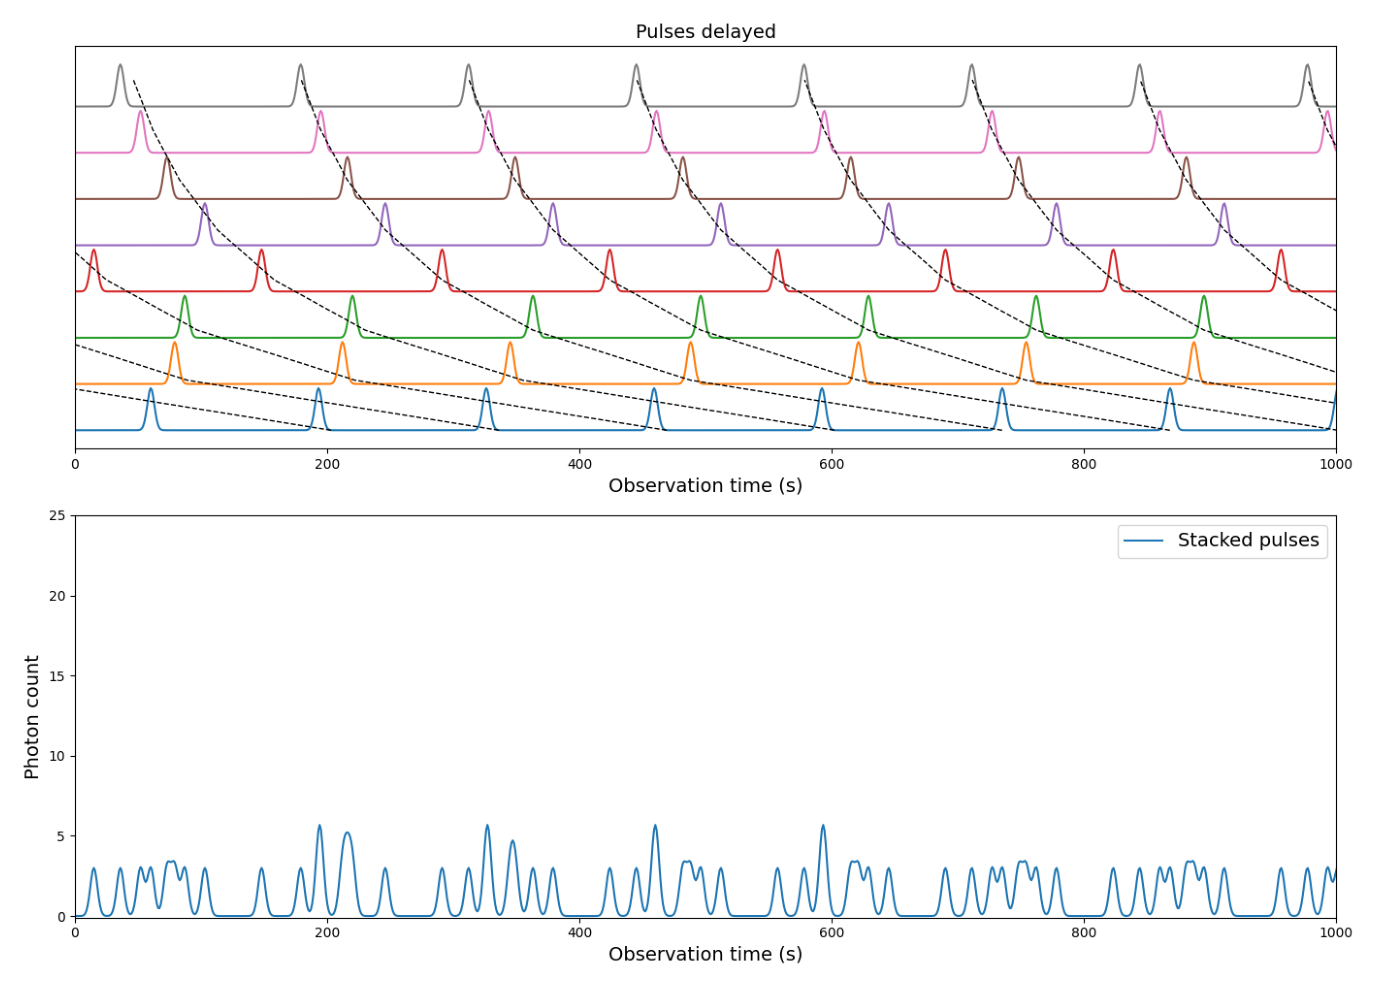

In [11]:
img = plt.imread("data_2/stacked_pulses_delayed.png")

plt.figure(figsize=(20, 10)) 
plt.imshow(img)
plt.axis("off")
plt.tight_layout()

Here we see that dispersion causes a time delay between the frequency channels.

Because the pulses are no longer aligned, stacking the channels does not add the signal together correctly.

---

### De-dispersion

**De-dispersion** is the process of shifting each frequency channel in time so that the pulses line up again.

Once the data is de-dispersed:
- the pulses align across all channels
- we can safely add the channels together
- the signal-to-noise ratio increases

De-dispersion is a crucial step in finding pulsars.

---

### Dispersion Measure

The strength of this time delay is described by a quantity called the **dispersion measure**, or **DM**.

DM tells us **how many free electrons** the radio waves passed through on their way to Earth.

A larger DM means:
- a larger time delay
- usually a more distant pulsar

---

### Time delay due to dispersion

The delay between pulses at different radio frequencies depends on:
- the observing frequency
- the DM of the pulsar

The relation is:

### $ \Delta t = - K \cdot \mathrm{DM} \cdot  \frac{1}{f^2}  $

where:
- $ \Delta t $ is the time delay
- $f$ is the radio frequency of the channel
- **DM** is the dispersion measure
- $ K $ is a constant


---

### Why DM matters

To correctly line up the pulsar pulses across all frequency channels, we need to know the **DM**.

In the previous challenge, we did not know the **period** of the pulsar.  
To solve this, we used a `for` loop to try many different trial periods until the pulsar signal appeared.

The same idea applies here.

We do not know how many free electrons are between us and the pulsar, so we do not know the correct DM in advance.  
This means we must try **many different trial DM values**.

Previously, we stacked all the channels together and then started folding.

Now for each trial DM:
- we first shift the frequency channels to correct for dispersion
- then we stack the shifted channels together
- then we search for the period

When we use the **correct DM** and the **correct period**, the pulses align across all channels and we find the pulsar.
